In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2 import Artifact, Visualization

from skbio.stats.distance import mantel, permanova, DistanceMatrix
from scipy.spatial.distance import pdist, cdist
from skbio.stats.ordination import pcoa
%matplotlib inline

# Setup

In [12]:
wuni = Artifact.load("core-diversity-results/weighted_unifrac_distance_matrix.qza").view(DistanceMatrix)
uuni = Artifact.load("core-diversity-results/unweighted_unifrac_distance_matrix.qza").view(DistanceMatrix)
bray = Artifact.load("core-diversity-results/bray_curtis_distance_matrix.qza").view(DistanceMatrix)

In [13]:
metadata = pd.read_csv("data/metadata.tsv", sep="\t", index_col="Sampleid")

In [14]:
metadata.columns

Index(['Subjectcode', 'Timepoint', 'Sex', 'Length', 'Birth Weight',
       'Gestational Age', 'Infections', 'Antibiotic use', 'Mothers Age',
       'Mothers Height', 'Mothers Weight', 'Education', 'Ethnicity Race',
       'Zip code', 'Annual Household Income', 'Smoke',
       'Smoke during pregnancy', 'Smoke after delivery', 'Alcohol',
       'Drinks before pregnancy per week', 'Current H. pylori infection',
       'Pregnancy complications', 'Probiotics during pregnancy',
       'Post-natal probiotics', 'Post-natal multivitamins',
       'Antibiotic use during pregnancy', 'Antibiotic use which trimester',
       'Antibiotic use Post-natal', 'Other post-natal medications',
       'High cholesterol', 'EBM-FF-PBM', 'Maternal relevant medical hx',
       'Current feeding method', 'Solid foods given', 'Baby Antibiotic use',
       'Mother antibiotic use'],
      dtype='object')

In [15]:
metadata["Participant"] = metadata["Subjectcode"]

## PCoA

In [16]:
uuni_pcoa = pcoa(uuni, number_of_dimensions=3)

uuni_pcoa.proportion_explained

PC1    0.245315
PC2    0.137098
PC3    0.107673
dtype: float64

In [27]:
wuni_pcoa = pcoa(wuni, number_of_dimensions=3)

wuni_pcoa.proportion_explained

/Users/johnsterrett/mambaforge/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.4061327428976467 and the largest is 9.013033150347638.
  warn(


PC1    0.349151
PC2    0.252022
PC3    0.130317
dtype: float64

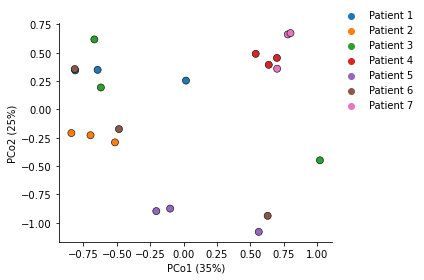

In [36]:
ax = sns.scatterplot(x="PC1", y="PC2", hue=metadata["Participant"], 
                     data=wuni_pcoa.samples,
                     s=50, edgecolor="black")

ax.set(xlabel="PCo1 (35%)", ylabel="PCo2 (25%)") #based on proportion explained in cell above

ax.spines[["right", "top"]].set_visible(False)
ax.legend(frameon=False, bbox_to_anchor=(1,1.1))

plt.tight_layout()
plt.savefig("Figures/participant_wuni_pcoa.png")
plt.savefig("Figures/participant_wuni_pcoa.pdf")
plt.show()

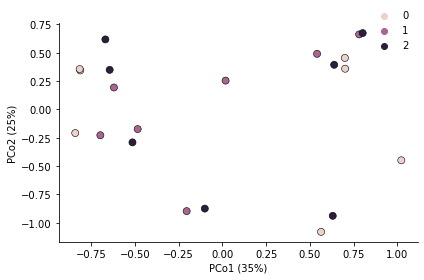

In [35]:
ax = sns.scatterplot(x="PC1", y="PC2", hue=metadata["Timepoint"], 
                     data=wuni_pcoa.samples,
                     s=50, edgecolor="black")

ax.set(xlabel="PCo1 (35%)", ylabel="PCo2 (25%)") #based on proportion explained in cell above

ax.spines[["right", "top"]].set_visible(False)
ax.legend(frameon=False, bbox_to_anchor=(1,1.1))

plt.tight_layout()
plt.savefig("Figures/timepoint_wuni_pcoa.png")
plt.savefig("Figures/timepoint_wuni_pcoa.pdf")
plt.show()

# Categorical variables

! qiime diversity beta-group-significance \
--i-distance-matrix core-diversity-results/weighted_unifrac_distance_matrix.qza \
--m-metadata-file data/metadata.tsv \
--m-metadata-column Subjectcode \
--o-visualization core-diversity-results/PERMANOVA-subject.qzv

! qiime diversity beta-group-significance \
--i-distance-matrix core-diversity-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file data/metadata.tsv \
--m-metadata-column Subjectcode \
--o-visualization core-diversity-results/PERMANOVA-subject-uuni.qzv

! qiime diversity beta-group-significance \
--i-distance-matrix core-diversity-results/bray_curtis_distance_matrix.qza \
--m-metadata-file data/metadata.tsv \
--m-metadata-column Subjectcode \
--o-visualization core-diversity-results/PERMANOVA-subject-bray.qzv

### The variation between individuals is significantly larger than the variation within individuals

#### Weighted UniFrac
- pseudo-F = 2.834
- p-value = 0.001

#### Unweighted UniFrac
- test statistic = 1.59645
- p-value = 0.008

#### Bray-Curtis
- test statistic = 2.9183
- p-value = 0.001

In [66]:
metadata["Mothers BMI"] = (metadata["Mothers Weight"]*0.453592) / ( (metadata["Mothers Height"]*0.3048)**2 )

In [67]:
t0 = metadata[metadata["Timepoint"]==0]
t1 = metadata[metadata["Timepoint"]==1]
t2 = metadata[metadata["Timepoint"]==2]

In [68]:
wuni.to_data_frame().loc[t0.index, t0.index]

Sampleid,B.F 1.1,B.F 2.1,B.F 3.1,B.F 4.1,B.F 5.1,B.F 6.1,B.F 7.1
Sampleid,,,,,,,
B.F 1.1,0.000000,1.028974,2.528423,1.686389,2.117143,0.334186,1.722657
B.F 2.1,1.028974,0.000000,2.496764,1.822662,1.776528,0.922868,1.782082
B.F 3.1,2.528423,2.496764,0.000000,2.060382,2.144976,2.493813,1.946281
B.F 4.1,1.686389,1.822662,2.060382,0.000000,1.693741,1.669384,0.250574
B.F 5.1,2.117143,1.776528,2.144976,1.693741,0.000000,2.108607,1.658396
B.F 6.1,0.334186,0.922868,2.493813,1.669384,2.108607,0.000000,1.697775
B.F 7.1,1.722657,1.782082,1.946281,0.250574,1.658396,1.697775,0.000000


In [71]:
cat_vars = ['Sex', 'Education', 'Ethnicity Race',
           'Smoke during pregnancy', 'Alcohol',
           'Post-natal multivitamins']

for var in cat_vars:
    print(f"\n----------\nVARIABLE: {var}")
    
    
    for distance_matrix, dist_name in [(wuni, "weighted UniFrac"), 
                                       (uuni, "Unweighted UniFrac"), 
                                       (bray, "Bray-Curtis")]:
        
        print("\n", dist_name.upper())
        
        #Time 0
        print("TIMEPOINT 0")
        dist = DistanceMatrix(distance_matrix.to_data_frame().loc[t0.index, t0.index], 
                      ids=t0.index)
        
        res = permanova(dist, t0, column=var)
        if res[5] < 0.05:
            print("**Significant**\n p= ", res[5])
            print("pseudo-F= ", res[4])
        else:
            print("Not significant")
            print("p= ", res[5])
            print("pseudo-F= ", res[4])
        
        
        #Time 1
        print("TIMEPOINT 1")
        dist = DistanceMatrix(distance_matrix.to_data_frame().loc[t1.index, t1.index], 
                      ids=t1.index)
        
        res = permanova(dist, t1, column=var)
        if res[5] < 0.05:
            print("**Significant**\n p= ", res[5])
            print("pseudo-F= ", res[4])
        else:
            print("Not significant")
            print("p= ", res[5])
            print("pseudo-F= ", res[4])
        
        #Time 2
        print("TIMEPOINT 2")
        dist = DistanceMatrix(distance_matrix.to_data_frame().loc[t2.index, t2.index], 
                      ids=t2.index)
        
        res = permanova(dist, t2, column=var)
        if res[5] < 0.05:
            print("**Significant**\n p= ", res[5])
            print("pseudo-F= ", res[4])
        else:
            print("Not significant")
            print("p= ", res[5])
            print("pseudo-F= ", res[4])


----------
VARIABLE: Sex

 WEIGHTED UNIFRAC
TIMEPOINT 0
Not significant
p=  0.103
pseudo-F=  2.171992167430291
TIMEPOINT 1
Not significant
p=  0.95
pseudo-F=  0.4728848974787888
TIMEPOINT 2
Not significant
p=  1.0
pseudo-F=  0.16942648250435302

 UNWEIGHTED UNIFRAC
TIMEPOINT 0
Not significant
p=  0.099
pseudo-F=  1.8738664994234207
TIMEPOINT 1
Not significant
p=  0.05
pseudo-F=  2.5160512777859774
TIMEPOINT 2
Not significant
p=  0.756
pseudo-F=  0.8298809342354851

 BRAY-CURTIS
TIMEPOINT 0
Not significant
p=  0.111
pseudo-F=  2.0617302961523967
TIMEPOINT 1
Not significant
p=  0.856
pseudo-F=  0.7917042355193296
TIMEPOINT 2
Not significant
p=  1.0
pseudo-F=  0.49174539556516833

----------
VARIABLE: Education

 WEIGHTED UNIFRAC
TIMEPOINT 0
Not significant
p=  0.762
pseudo-F=  0.6354415047047295
TIMEPOINT 1
Not significant
p=  0.41
pseudo-F=  1.0744823690275147
TIMEPOINT 2
Not significant
p=  0.836
pseudo-F=  0.5991856686912421

 UNWEIGHTED UNIFRAC
TIMEPOINT 0
Not significant
p=  0.834


In [72]:
print("MANTEL RESULTS")

for var in ['Length', 'Birth Weight', 'Gestational Age', 'Mothers Height', 
            'Mothers Weight', 'Mothers BMI']:
    print("\n----------------")
    
    for distance_matrix, dist_name in [(wuni, "weighted UniFrac"), 
                                       (uuni, "Unweighted UniFrac"), 
                                       (bray, "Bray-Curtis")]:
        for timepoint in [0,1,2]:

            print("\n", var ," ", dist_name.upper(), f" Timepoint {timepoint}")


            #initialize empty distance matrix
            dat = metadata.loc[metadata["Timepoint"]==timepoint, var].dropna()
            dim = dat.shape[0]
            distm = np.empty((dim, dim))

            #fill distance matrix
            for i in range(dim):
                for j in range(dim):
                    distm[i,j] = np.abs(dat.iloc[i]-dat.iloc[j])

            distm = DistanceMatrix(distm, ids=dat.index)

            #filter where we don't have data
            microbiome_distm = DistanceMatrix(uuni.to_data_frame().loc[dat.index,dat.index], 
                                      ids=dat.index)
            #do the mantel
            man = mantel(microbiome_distm, 
                        distm,
                        method="spearman")

            
            if man[1] > 0.05:
                print("corr coef: ", man[0])
                print("p value: ", man[1])
            else:
                print("***SIGNIFICANT***")
                print("corr coef: ", man[0])
                print("p value: ", man[1])

MANTEL RESULTS

----------------

 Length   WEIGHTED UNIFRAC  Timepoint 0
corr coef:  0.21762363695161277
p value:  0.492

 Length   WEIGHTED UNIFRAC  Timepoint 1
corr coef:  -0.37064025668321543
p value:  0.164

 Length   WEIGHTED UNIFRAC  Timepoint 2
corr coef:  0.17137861409939506
p value:  0.511

 Length   UNWEIGHTED UNIFRAC  Timepoint 0
corr coef:  0.21762363695161277
p value:  0.497

 Length   UNWEIGHTED UNIFRAC  Timepoint 1
corr coef:  -0.37064025668321543
p value:  0.156

 Length   UNWEIGHTED UNIFRAC  Timepoint 2
corr coef:  0.17137861409939506
p value:  0.483

 Length   BRAY-CURTIS  Timepoint 0
corr coef:  0.21762363695161277
p value:  0.496

 Length   BRAY-CURTIS  Timepoint 1
corr coef:  -0.37064025668321543
p value:  0.157

 Length   BRAY-CURTIS  Timepoint 2
corr coef:  0.17137861409939506
p value:  0.5

----------------

 Birth Weight   WEIGHTED UNIFRAC  Timepoint 0
corr coef:  0.05064935064935065
p value:  0.863

 Birth Weight   WEIGHTED UNIFRAC  Timepoint 1
corr coef:  -0

In [61]:
np.random.seed(42)

var = 'Timepoint'
        
for distance_matrix, dist_name in [(wuni, "weighted UniFrac"), 
                                   (uuni, "Unweighted UniFrac"), 
                                   (bray, "Bray-Curtis")]:

    print("\n", var ," ", dist_name.upper())


    #initialize empty distance matrix
    dat = metadata[var].dropna()
    dim = dat.shape[0]
    distm = np.empty((dim, dim))

    #fill distance matrix
    for i in range(dim):
        for j in range(dim):
            distm[i,j] = np.abs(dat.iloc[i]-dat.iloc[j])

    distm = DistanceMatrix(distm, ids=dat.index)

    #filter where we don't have data
    microbiome_distm = DistanceMatrix(uuni.to_data_frame().loc[dat.index,dat.index], 
                              ids=dat.index)
    #do the mantel
    man = mantel(microbiome_distm, 
                distm,
                method="spearman")


    if man[1] > 0.05:
        print("Not Significant")
    print("corr coef: ", man[0])
    print("p value: ", man[1])


 Timepoint   WEIGHTED UNIFRAC
Not Significant
corr coef:  0.12856153105647775
p value:  0.063

 Timepoint   UNWEIGHTED UNIFRAC
Not Significant
corr coef:  0.12856153105647775
p value:  0.06

 Timepoint   BRAY-CURTIS
Not Significant
corr coef:  0.12856153105647775
p value:  0.051


# Taxa barplot

In [74]:
!qiime taxa barplot \
--i-table data/noMito_noChloro-filtered-table.qza \
--i-taxonomy data/taxonomy-silva.qza \
--m-metadata-file data/metadata.tsv \
--o-visualization data/taxa-barplot.qzv

Saved Visualization to: data/taxa-barplot.qzv
